In [1]:
#fas-정재환
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import numpy as np
import csv
import json
import seaborn as sns
%matplotlib inline 

In [2]:
#저장된 csv파일을 0번째줄을 인덱스 시작으로 읽어온다
data_health = pd.read_csv("health.csv", index_col=0)
#특정 컬럼(WEIGHT) 값이 5로 나누어 떨어지지 않는 데이터는 모두 삭제한다
remove_index = data_health[data_health['WEIGHT'] % 5 != 0].index
data_health = data_health.drop(remove_index)
data_health.reset_index(drop=True, inplace=True)
data_health

,HEIGHT,WEIGHT,WAIST,MAX_PRESSURE,HEMOGLOBIN,SMOKE
0,160,60,80.0,128,16.6,3
1,180,70,83.0,119,14.2,3
2,160,55,73.0,129,14.2,1
3,155,50,73.0,101,16.5,1
4,160,50,71.0,104,14.8,1
...,...,...,...,...,...,...
1153,140,45,79.0,118,12.5,1
1154,175,75,85.0,100,14.8,3
1155,170,75,86.0,141,15.5,2
1156,169,70,89.9,113,15.0,1


In [9]:
#컬럼명 변경
data_health = data_health.rename({'HEIGHT':'신장', 'WEIGHT':'체중', 'WAIST':'허리둘레', 'MAX_PRESSURE':'혈압', 'HEMOGLOBIN':'적혈구', 'SMOKE':'흡연'}, axis='columns')
data_health

,신장,체중,허리둘레,혈압,적혈구,흡연
0,160,60,80.0,128,16.6,3
1,180,70,83.0,119,14.2,3
2,160,55,73.0,129,14.2,1
3,155,50,73.0,101,16.5,1
4,160,50,71.0,104,14.8,1
...,...,...,...,...,...,...
1153,140,45,79.0,118,12.5,1
1154,175,75,85.0,100,14.8,3
1155,170,75,86.0,141,15.5,2
1156,169,70,89.9,113,15.0,1


In [10]:
#한글 폰트 적용 - 한글깨짐 방지
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False

(array([  1.,   0.,   1.,   0.,   0.,   1.,   4.,   2.,   1.,   5.,   7.,
          5.,  27.,  32.,  48.,  72.,  89.,  91., 138.,  97., 116., 101.,
         96., 103.,  85.,  16.,   8.,   5.,   4.,   3.]),
 array([ 6.2       ,  6.61666667,  7.03333333,  7.45      ,  7.86666667,
         8.28333333,  8.7       ,  9.11666667,  9.53333333,  9.95      ,
        10.36666667, 10.78333333, 11.2       , 11.61666667, 12.03333333,
        12.45      , 12.86666667, 13.28333333, 13.7       , 14.11666667,
        14.53333333, 14.95      , 15.36666667, 15.78333333, 16.2       ,
        16.61666667, 17.03333333, 17.45      , 17.86666667, 18.28333333,
        18.7       ]),
 <BarContainer object of 30 artists>)

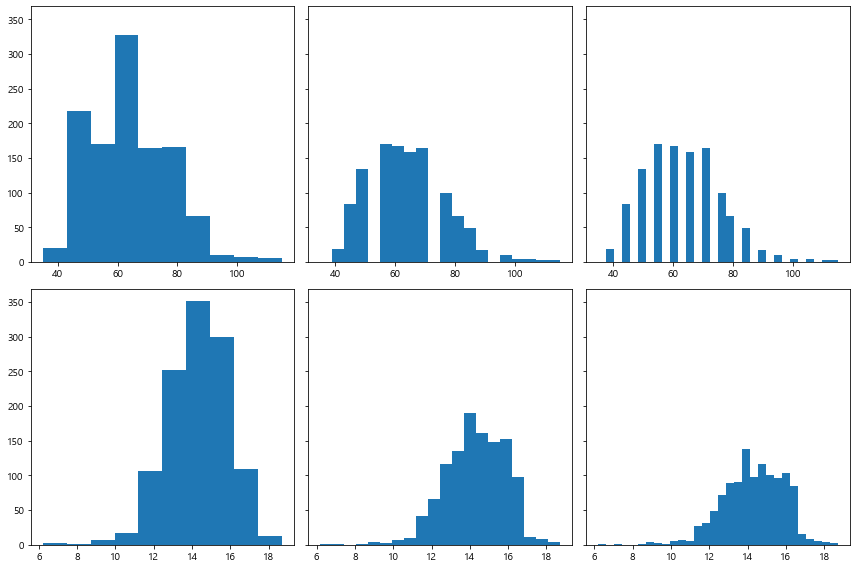

In [11]:
#히스토그램
fig, axs = plt.subplots(2, 3, sharey=True, tight_layout=True, figsize=(12, 8))

# bins를 이용해 막대 갯수, 단위 지정
axs[0,0].hist(data_health['체중'], bins=10)
axs[0,1].hist(data_health['체중'], bins=20)
axs[0,2].hist(data_health['체중'], bins=30)
axs[1,0].hist(data_health['적혈구'], bins=10)
axs[1,1].hist(data_health['적혈구'], bins=20)
axs[1,2].hist(data_health['적혈구'], bins=30)

(array([  1.,   0.,   1.,   0.,   0.,   1.,   4.,   2.,   1.,   5.,   7.,
          5.,  27.,  32.,  48.,  72.,  89.,  91., 138.,  97., 116., 101.,
         96., 103.,  85.,  16.,   8.,   5.,   4.,   3.]),
 array([ 6.2       ,  6.61666667,  7.03333333,  7.45      ,  7.86666667,
         8.28333333,  8.7       ,  9.11666667,  9.53333333,  9.95      ,
        10.36666667, 10.78333333, 11.2       , 11.61666667, 12.03333333,
        12.45      , 12.86666667, 13.28333333, 13.7       , 14.11666667,
        14.53333333, 14.95      , 15.36666667, 15.78333333, 16.2       ,
        16.61666667, 17.03333333, 17.45      , 17.86666667, 18.28333333,
        18.7       ]),
 [<matplotlib.patches.Polygon at 0x14f83290>])

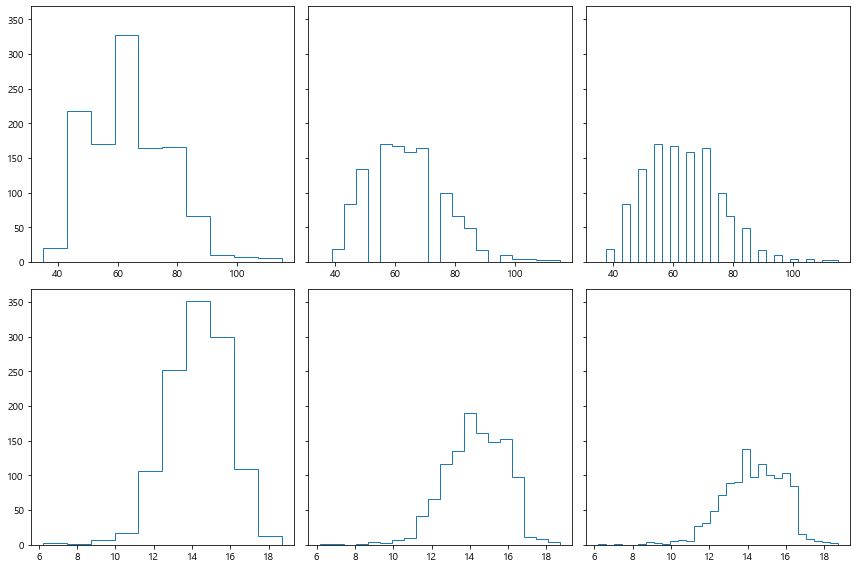

In [12]:
#히스토그램 - 계단형
fig, axs = plt.subplots(2, 3, sharey=True, tight_layout=True, figsize=(12, 8))

# bins를 이용해 막대 갯수, 단위 지정
axs[0,0].hist(data_health['체중'], bins=10, histtype='step')
axs[0,1].hist(data_health['체중'], bins=20, histtype='step')
axs[0,2].hist(data_health['체중'], bins=30, histtype='step')
axs[1,0].hist(data_health['적혈구'], bins=10, histtype='step')
axs[1,1].hist(data_health['적혈구'], bins=20, histtype='step')
axs[1,2].hist(data_health['적혈구'], bins=30, histtype='step')

c:\users\jeongjh\appdata\local\programs\python\python36-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\jeongjh\appdata\local\programs\python\python36-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\jeongjh\appdata\local\programs\python\python36-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code

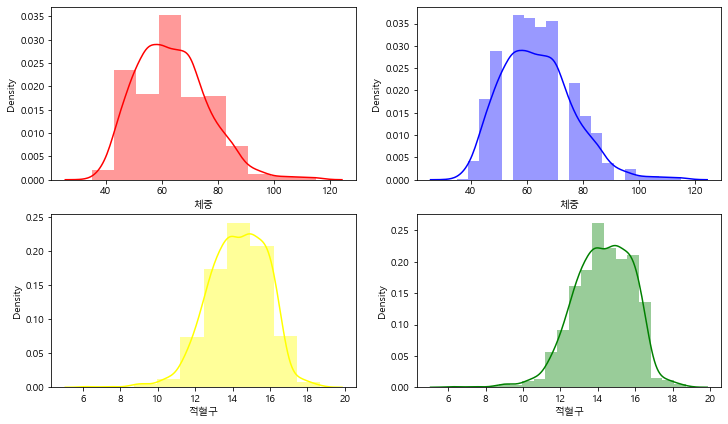

In [13]:
# distplot - 히스토그램 + 라인 그래프
fig, axes = plt.subplots(2, 2, figsize=(12, 7))

# bins를 이용해 막대 갯수, 단위 지정
sns.distplot(data_health['체중'], bins=10, color="red", ax=axes[0,0])
sns.distplot(data_health['체중'], bins=20, color="blue", ax=axes[0,1])
sns.distplot(data_health['적혈구'], bins=10, color="yellow", ax=axes[1,0])
sns.distplot(data_health['적혈구'], bins=20, color="green", ax=axes[1,1])
plt.show()

c:\users\jeongjh\appdata\local\programs\python\python36-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\jeongjh\appdata\local\programs\python\python36-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\jeongjh\appdata\local\programs\python\python36-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code

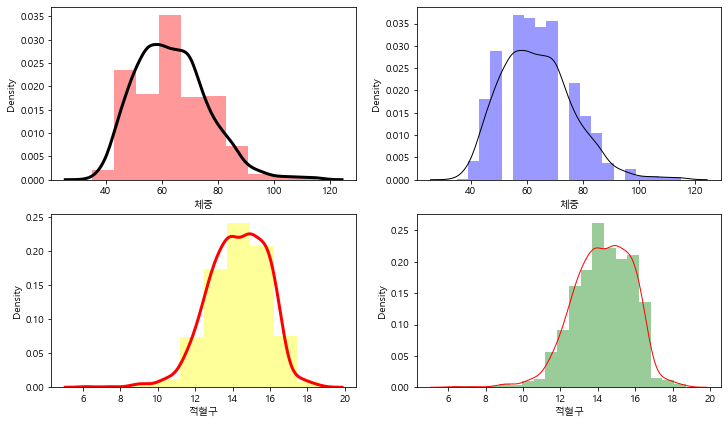

In [14]:
# distplot - 라인 스타일 지정
fig, axes = plt.subplots(2, 2, figsize=(12, 7))

# bins를 이용해 막대 갯수, 단위 지정
sns.distplot(data_health['체중'], bins=10, color="red", kde_kws={"color": "k", "lw": 3}, ax=axes[0,0])
sns.distplot(data_health['체중'], bins=20, color="blue", kde_kws={"color": "k", "lw": 1}, ax=axes[0,1])
sns.distplot(data_health['적혈구'], bins=10, color="yellow", kde_kws={"color": "r", "lw": 3}, ax=axes[1,0])
sns.distplot(data_health['적혈구'], bins=20, color="green", kde_kws={"color": "r", "lw": 1}, ax=axes[1,1])
plt.show()

c:\users\jeongjh\appdata\local\programs\python\python36-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\jeongjh\appdata\local\programs\python\python36-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\jeongjh\appdata\local\programs\python\python36-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code

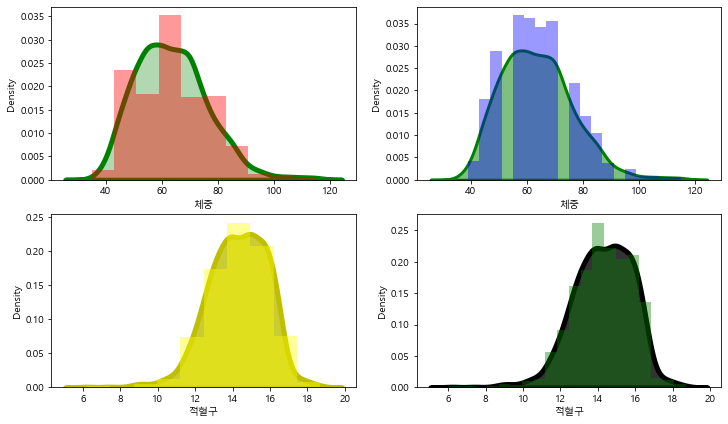

In [15]:
# distplot - 밀도 분포 지정
fig, axes = plt.subplots(2, 2, figsize=(12, 7))

# bins를 이용해 막대 갯수, 단위 지정
sns.distplot(data_health['체중'], bins=10, color="red", kde_kws={"color": "g", "alpha": 0.3, "linewidth" : 5, "shade" : True}, ax=axes[0,0])
sns.distplot(data_health['체중'], bins=20, color="blue", kde_kws={"color": "g", "alpha": 0.5, "linewidth" : 3, "shade" : True}, ax=axes[0,1])
sns.distplot(data_health['적혈구'], bins=10, color="yellow", kde_kws={"color": "y", "alpha": 0.8, "linewidth" : 5, "shade" : True}, ax=axes[1,0])
sns.distplot(data_health['적혈구'], bins=20, color="green", kde_kws={"color": "k", "alpha": 0.8, "linewidth" : 5, "shade" : True}, ax=axes[1,1])
plt.show()

c:\users\jeongjh\appdata\local\programs\python\python36-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\jeongjh\appdata\local\programs\python\python36-32\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
c:\users\jeongjh\appdata\local\programs\python\python36-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for his

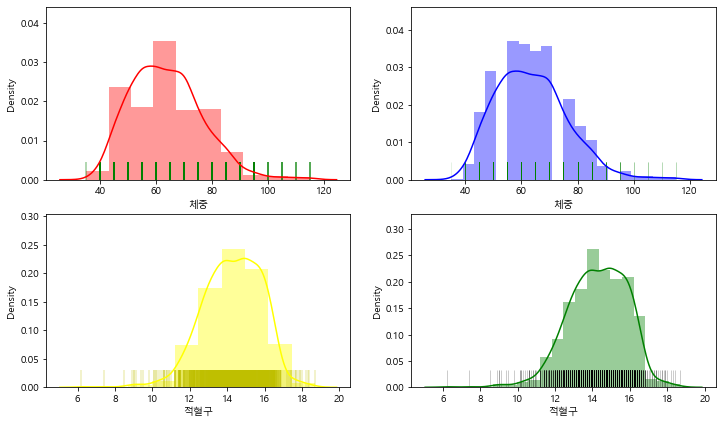

In [16]:
# distplot - rug조정
fig, axes = plt.subplots(2, 2, figsize=(12, 7))

# bins를 이용해 막대 갯수, 단위 지정
sns.distplot(data_health['체중'], bins=10, color="red", rug=True, rug_kws={"color": "g", "alpha": 0.3, "linewidth" : 2, "height" : 0.1}, ax=axes[0,0])
sns.distplot(data_health['체중'], bins=20, color="blue", rug=True, rug_kws={"color": "g", "alpha": 0.1, "linewidth" : 1, "height" : 0.1}, ax=axes[0,1])
sns.distplot(data_health['적혈구'], bins=10, color="yellow", rug=True, rug_kws={"color": "y", "alpha": 0.2, "linewidth" : 2, "height" : 0.1}, ax=axes[1,0])
sns.distplot(data_health['적혈구'], bins=20, color="green", rug=True, rug_kws={"color": "k", "alpha": 0.2, "linewidth" : 1, "height" : 0.1}, ax=axes[1,1])
plt.show()

c:\users\jeongjh\appdata\local\programs\python\python36-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\jeongjh\appdata\local\programs\python\python36-32\lib\site-packages\seaborn\distributions.py:1649: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)
c:\users\jeongjh\appdata\local\programs\python\python36-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

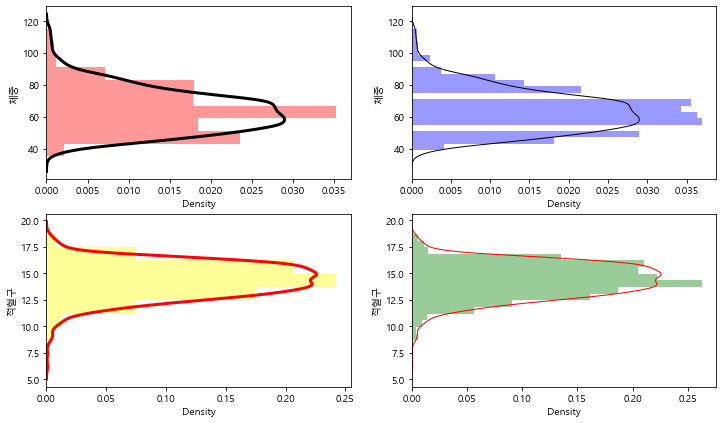

In [17]:
# distplot - 세로축으로 출력
fig, axes = plt.subplots(2, 2, figsize=(12, 7))

# bins를 이용해 막대 갯수, 단위 지정
sns.distplot(data_health['체중'], bins=10, color="red", kde_kws={"color": "k", "lw": 3}, vertical=True, ax=axes[0,0])
sns.distplot(data_health['체중'], bins=20, color="blue", kde_kws={"color": "k", "lw": 1}, vertical=True, ax=axes[0,1])
sns.distplot(data_health['적혈구'], bins=10, color="yellow", kde_kws={"color": "r", "lw": 3}, vertical=True, ax=axes[1,0])
sns.distplot(data_health['적혈구'], bins=20, color="green", kde_kws={"color": "r", "lw": 1}, vertical=True, ax=axes[1,1])
plt.show()